# Interesting Distribution of Delayed Time

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df1 = pd.read_csv("573883308_T_ONTIME_1.csv")
df2 = pd.read_csv("573883308_T_ONTIME_3.csv")
df1 = df1.append(df2)
delayed_df = df1.loc[df1['DEP_DEL15'] == 1]

The delayed time as we can expected, follows an exponential distribution.

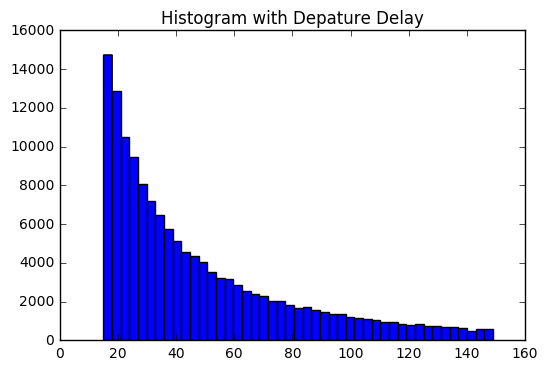

In [5]:
plt.hist(delayed_df.loc[delayed_df.DEP_DELAY <150].DEP_DELAY, bins= 45) 
plt.title("Histogram with Depature Delay")
plt.show()

However, when the bins are set different, the histogram start to show some interesting pattern. There seems to be two smooth  exponential distributions. 

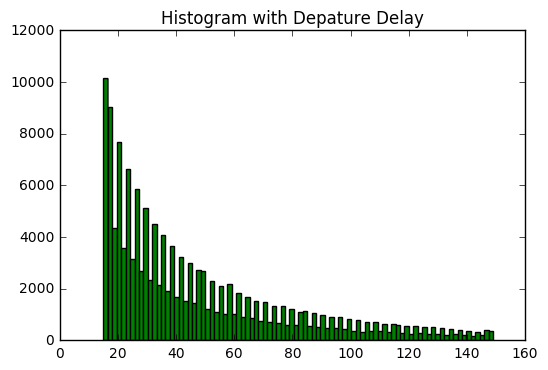

In [7]:
plt.hist(delayed_df.loc[delayed_df.DEP_DELAY <150].DEP_DELAY, bins= "auto") 
plt.title("Histogram of Depature Delay")
plt.show()

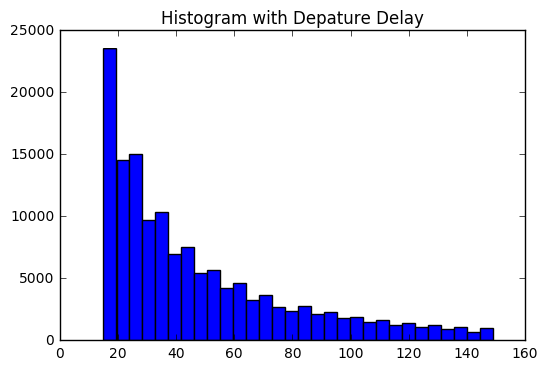

In [8]:
plt.hist(delayed_df.loc[delayed_df.DEP_DELAY <150].DEP_DELAY, bins= 30) 
plt.title("Histogram of Depature Delay")
plt.show()

What can cause this interesting pattern? I was thinking maybe the last digit of all the delay time is not uniformly distribute. So I check it.

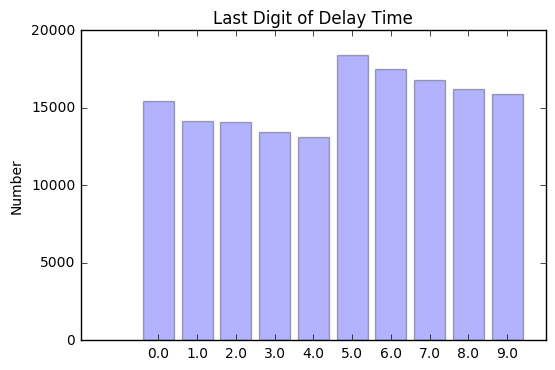

In [9]:
freq_number = Counter(delayed_df.DEP_DELAY % 10)
freq = []
num =[]
for i in freq_number.values():
    freq.append(i)
    
for i in freq_number.keys():
    num.append(i)

y_pos = range(len(num))
plt.bar(y_pos, freq, align='center',alpha = 0.3)
plt.xticks(y_pos, num)
plt.ylabel('Number')
plt.title('Last Digit of Delay Time')
plt.show()

This pattern of last digit is very interesting. Normally we think the last digit should be about uniform distribution. However, it actually shows a decreasing pattern from 5 to 4 (5-6-7-8-9-0-1-2-3-4). This could be more interestin if the delay time is reported by the working stuff. Check the data from only one month, it follows the same pattern.

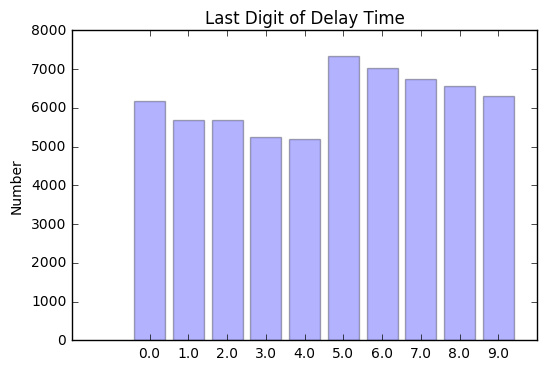

In [10]:
delayed_df2 = df2.loc[df2['DEP_DEL15'] == 1]
freq_number = Counter(delayed_df2.DEP_DELAY % 10)
freq = []
num =[]
for i in freq_number.values():
    freq.append(i)
    
for i in freq_number.keys():
    num.append(i)

y_pos = range(len(num))
plt.bar(y_pos, freq, align='center',alpha = 0.3)
plt.xticks(y_pos, num)
plt.ylabel('Number')
plt.title('Last Digit of Delay Time')
plt.show()